In [4]:
# Install citipy
!pip install citipy


In [7]:
# Import dependendcies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np
from scipy.stats import linregress

# from numpy import random

# Pull API key
# from config import api_key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)


In [6]:
# Create a random number generator to pull city name and lat, long for 500 cities using citipy
    # iterative loop with lists for city name, city lat, city long
# use openweathermap.org to pull weather data for representatitive city
    # research API documentation to understand format to pull for each city
    # single pull after city name list is created?
# read data from JSON file; do this for a single city first



In [8]:
# Create a random city pull request
# latitude = runs east-west, y-values range between -90 and +90
# longitude = runs north_south, x-coordinates are between -180 and +180


from numpy import random
lat = random.randint(low=-90, high=90, size=1)
long = random.randint(low=-180, high=180, size=1)

print(lat, long)

[-75] [-19]


In [9]:
# Test citipy with single city pull

city = citipy.nearest_city(lat, long)
city_out = city.city_name
city_out

'ushuaia'

In [10]:
# Test OpenWeather with single city weather request

# Set API key (Note:  not able to pull from config file)
api_key = weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?"
city = city_out

# Build query URL, and print output
query_url = url + "appid=" + api_key + "&q=" + city
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=73f5eef4ab6510912790a3c3d182fec9&q=ushuaia


In [11]:
# Test output data with input data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
name = weather_json["name"]
longs = weather_json["coord"]["lon"]
lats = weather_json["coord"]["lat"]
temp = weather_json["main"]["temp"]
humid = weather_json["main"]["humidity"]
clouds = weather_json["clouds"]["all"]
windspd = weather_json["wind"]["speed"]

print(name, lats, longs, temp, humid, clouds, windspd)



Ushuaia -54.8 -68.3 277.15 87 40 7.2


In [73]:
## Fixes
    # Change dependencies
    # Change lat lon to pull from actual city data in weather data base
    # Check output value units and convert if needed


# Import dependencies
from numpy import random
from numpy import arange

# Set API key (fix to pull from config file)
api_key = weather_api_key

# Initialize lists to store values, set counter range for use in loop:

cities = []
latitude = []
longitude = []
tempurature = []
humidity = []
cloudiness = []
windspeed = []

counter = arange(1,1500)
totcount = len(counter)

for count in counter:

    # generate random coordinates for cities, store latitude and longitude
    citylat = int(random.randint(low=-90, high=90, size=1))
    citylong = int(random.randint(low=-180, high=180, size=1))
    
    # find city using citipy, store city
    city = citipy.nearest_city(citylat, citylong)
    city_out = city.city_name
    city_out
    
    print("Processing record {0} of {1}:  {2}".format(count, totcount, city_out))

    # Set endoint, build query-url
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + api_key + "&q=" + city_out
    
    # Get weather datafile, check response code, if response code !200, then continue
    weather_response = requests.get(query_url)
    
    if weather_response.status_code != 200:
        print(f"{city_out} not found.  Skipping ... ")
        continue
    
    elif weather_response.status_code == 200:
        # if valid repsonse code, append city name, longitude, and latitude
        cities.append(city_out)  
        
        weather_json = weather_response.json()
        # print(query_url)

        # Select temperature (F), humidity (%), cloudiness (%), and wind speed (mph) from json
        long = weather_json["coord"]["lon"]
        lat = weather_json["coord"]["lat"]
        temp = weather_json["main"]["temp"]
        humid = weather_json["main"]["humidity"]
        clouds = weather_json["clouds"]["all"]
        windspd = weather_json["wind"]["speed"]
        
        # print(city_out, long, lat, temp, humid, windspd, clouds)
     

        # store city location and weather data to file
        longitude.append(long)
        latitude.append(lat)
        tempurature.append(temp)
        humidity.append(humid)
        cloudiness.append(clouds)
        windspeed.append(windspd)

        # troubleshoot = {"City":  city_out, "Temp": temp, "Humidity": humid, "Clouds": cloudiness, "Winds": windspeed}
        # print(troubleshoot)

        # print city to create print log for each city
        # print(city_out)

# format output to DataFrame    
output = {"City": cities, "Longitude": longitude, "Latitude": latitude, "Tempurature": tempurature, 
      "Humidity": humidity, "Windspeed": windspeed, "Cloudiness": cloudiness}

# Create a summary reccord of cities and data points found
print(len(cities), len(longitude), len(latitude), len(tempurature), len(humidity), len(cloudiness), len(windspeed))

Processing record 1 of 1499:  chuy
Processing record 2 of 1499:  caravelas
Processing record 3 of 1499:  cherskiy
Processing record 4 of 1499:  bambous virieux
Processing record 5 of 1499:  east london
Processing record 6 of 1499:  santiago
Processing record 7 of 1499:  mataura
Processing record 8 of 1499:  grindavik
Processing record 9 of 1499:  norman wells
Processing record 10 of 1499:  lemgo
Processing record 11 of 1499:  yar-sale
Processing record 12 of 1499:  livramento
Processing record 13 of 1499:  guerrero negro
Processing record 14 of 1499:  marawi
Processing record 15 of 1499:  atuona
Processing record 16 of 1499:  cape town
Processing record 17 of 1499:  ostrovnoy
Processing record 18 of 1499:  verkhoyansk
Processing record 19 of 1499:  amderma
amderma not found.  Skipping ... 
Processing record 20 of 1499:  pangnirtung
Processing record 21 of 1499:  tumannyy
tumannyy not found.  Skipping ... 
Processing record 22 of 1499:  beloha
Processing record 23 of 1499:  albanel
Proc

Processing record 189 of 1499:  turukhansk
Processing record 190 of 1499:  rikitea
Processing record 191 of 1499:  ashford
Processing record 192 of 1499:  avarua
Processing record 193 of 1499:  busselton
Processing record 194 of 1499:  sentyabrskiy
sentyabrskiy not found.  Skipping ... 
Processing record 195 of 1499:  attawapiskat
attawapiskat not found.  Skipping ... 
Processing record 196 of 1499:  kodiak
Processing record 197 of 1499:  wanning
Processing record 198 of 1499:  grand river south east
grand river south east not found.  Skipping ... 
Processing record 199 of 1499:  bilma
Processing record 200 of 1499:  college
Processing record 201 of 1499:  komsomolskiy
Processing record 202 of 1499:  kodiak
Processing record 203 of 1499:  port hardy
Processing record 204 of 1499:  nanortalik
Processing record 205 of 1499:  pangnirtung
Processing record 206 of 1499:  mataura
Processing record 207 of 1499:  lata
Processing record 208 of 1499:  alta floresta
Processing record 209 of 1499:

Processing record 376 of 1499:  qaanaaq
Processing record 377 of 1499:  wuchang
Processing record 378 of 1499:  busselton
Processing record 379 of 1499:  umba
Processing record 380 of 1499:  barra patuca
Processing record 381 of 1499:  airai
Processing record 382 of 1499:  puerto ayora
Processing record 383 of 1499:  kaitangata
Processing record 384 of 1499:  dicabisagan
Processing record 385 of 1499:  ushuaia
Processing record 386 of 1499:  vila franca do campo
Processing record 387 of 1499:  saint-philippe
Processing record 388 of 1499:  faya
Processing record 389 of 1499:  kapaa
Processing record 390 of 1499:  airai
Processing record 391 of 1499:  cherskiy
Processing record 392 of 1499:  mys shmidta
mys shmidta not found.  Skipping ... 
Processing record 393 of 1499:  qaanaaq
Processing record 394 of 1499:  vaini
Processing record 395 of 1499:  port alfred
Processing record 396 of 1499:  atuona
Processing record 397 of 1499:  ushuaia
Processing record 398 of 1499:  jackson
Processin

Processing record 563 of 1499:  pringsewu
Processing record 564 of 1499:  clyde river
Processing record 565 of 1499:  namibe
Processing record 566 of 1499:  castro
Processing record 567 of 1499:  vaini
Processing record 568 of 1499:  lebu
Processing record 569 of 1499:  mataura
Processing record 570 of 1499:  taolanaro
taolanaro not found.  Skipping ... 
Processing record 571 of 1499:  sobolevo
Processing record 572 of 1499:  hilo
Processing record 573 of 1499:  port blair
Processing record 574 of 1499:  busselton
Processing record 575 of 1499:  kloulklubed
Processing record 576 of 1499:  illoqqortoormiut
illoqqortoormiut not found.  Skipping ... 
Processing record 577 of 1499:  rikitea
Processing record 578 of 1499:  victoria
Processing record 579 of 1499:  korla
Processing record 580 of 1499:  kapaa
Processing record 581 of 1499:  rikitea
Processing record 582 of 1499:  ushuaia
Processing record 583 of 1499:  nisia floresta
Processing record 584 of 1499:  mys shmidta
mys shmidta not 

Processing record 749 of 1499:  makakilo city
Processing record 750 of 1499:  laguna
Processing record 751 of 1499:  bethel
Processing record 752 of 1499:  hobart
Processing record 753 of 1499:  avera
Processing record 754 of 1499:  ushuaia
Processing record 755 of 1499:  port elizabeth
Processing record 756 of 1499:  thompson
Processing record 757 of 1499:  avanigadda
Processing record 758 of 1499:  castro
Processing record 759 of 1499:  coahuayana
Processing record 760 of 1499:  chibombo
Processing record 761 of 1499:  avarua
Processing record 762 of 1499:  hobart
Processing record 763 of 1499:  astana
Processing record 764 of 1499:  hay river
Processing record 765 of 1499:  port hardy
Processing record 766 of 1499:  hithadhoo
Processing record 767 of 1499:  ribeira grande
Processing record 768 of 1499:  lavrentiya
Processing record 769 of 1499:  iqaluit
Processing record 770 of 1499:  bluff
Processing record 771 of 1499:  longyearbyen
Processing record 772 of 1499:  erzin
Processing

Processing record 936 of 1499:  barentsburg
barentsburg not found.  Skipping ... 
Processing record 937 of 1499:  saint george
Processing record 938 of 1499:  katsuura
Processing record 939 of 1499:  tabiauea
tabiauea not found.  Skipping ... 
Processing record 940 of 1499:  taolanaro
taolanaro not found.  Skipping ... 
Processing record 941 of 1499:  goderich
Processing record 942 of 1499:  caravelas
Processing record 943 of 1499:  jamestown
Processing record 944 of 1499:  cheney
Processing record 945 of 1499:  claveria
Processing record 946 of 1499:  mataura
Processing record 947 of 1499:  taolanaro
taolanaro not found.  Skipping ... 
Processing record 948 of 1499:  upernavik
Processing record 949 of 1499:  hermanus
Processing record 950 of 1499:  jiamusi
Processing record 951 of 1499:  vaini
Processing record 952 of 1499:  illoqqortoormiut
illoqqortoormiut not found.  Skipping ... 
Processing record 953 of 1499:  nikolskoye
Processing record 954 of 1499:  marsh harbour
Processing re

Processing record 1115 of 1499:  cayenne
Processing record 1116 of 1499:  airai
Processing record 1117 of 1499:  busselton
Processing record 1118 of 1499:  port alfred
Processing record 1119 of 1499:  busselton
Processing record 1120 of 1499:  taolanaro
taolanaro not found.  Skipping ... 
Processing record 1121 of 1499:  kruisfontein
Processing record 1122 of 1499:  rikitea
Processing record 1123 of 1499:  bluff
Processing record 1124 of 1499:  bambous virieux
Processing record 1125 of 1499:  kodinsk
Processing record 1126 of 1499:  hambantota
Processing record 1127 of 1499:  provideniya
Processing record 1128 of 1499:  bandarbeyla
Processing record 1129 of 1499:  sorland
Processing record 1130 of 1499:  luderitz
Processing record 1131 of 1499:  saint-philippe
Processing record 1132 of 1499:  pangnirtung
Processing record 1133 of 1499:  busselton
Processing record 1134 of 1499:  yellowknife
Processing record 1135 of 1499:  okhotsk
Processing record 1136 of 1499:  attawapiskat
attawapis

Processing record 1294 of 1499:  kinablangan
Processing record 1295 of 1499:  erzin
Processing record 1296 of 1499:  gimbi
Processing record 1297 of 1499:  cape town
Processing record 1298 of 1499:  hermanus
Processing record 1299 of 1499:  busselton
Processing record 1300 of 1499:  albany
Processing record 1301 of 1499:  kodinsk
Processing record 1302 of 1499:  skibbereen
Processing record 1303 of 1499:  harper
Processing record 1304 of 1499:  bambous virieux
Processing record 1305 of 1499:  kapaa
Processing record 1306 of 1499:  bluff
Processing record 1307 of 1499:  tateyama
Processing record 1308 of 1499:  tasiilaq
Processing record 1309 of 1499:  la ronge
Processing record 1310 of 1499:  ribeira grande
Processing record 1311 of 1499:  cidreira
Processing record 1312 of 1499:  ketchikan
Processing record 1313 of 1499:  egvekinot
Processing record 1314 of 1499:  ketchikan
Processing record 1315 of 1499:  hilo
Processing record 1316 of 1499:  port elizabeth
Processing record 1317 of 

Processing record 1480 of 1499:  arraial do cabo
Processing record 1481 of 1499:  mahebourg
Processing record 1482 of 1499:  tadine
Processing record 1483 of 1499:  mataura
Processing record 1484 of 1499:  trinidad
Processing record 1485 of 1499:  glencoe
Processing record 1486 of 1499:  lagunas
Processing record 1487 of 1499:  bluff
Processing record 1488 of 1499:  busselton
Processing record 1489 of 1499:  cidreira
Processing record 1490 of 1499:  puerto ayora
Processing record 1491 of 1499:  barentsburg
barentsburg not found.  Skipping ... 
Processing record 1492 of 1499:  chokurdakh
Processing record 1493 of 1499:  slave lake
Processing record 1494 of 1499:  utiroa
utiroa not found.  Skipping ... 
Processing record 1495 of 1499:  east london
Processing record 1496 of 1499:  noumea
Processing record 1497 of 1499:  qaanaaq
Processing record 1498 of 1499:  libano
Processing record 1499 of 1499:  fayaoue
1385 1385 1385 1385 1385 1385 1385


In [74]:
# Convert to dataframe
output_df = pd.DataFrame(output)
output_df.head()

City  Longitude  Latitude  Tempurature  Humidity  Windspeed  \
0             chuy     -53.46    -33.70       291.30        95       3.08   
1        caravelas     -39.25    -17.71       294.64        91       3.17   
2         cherskiy     161.30     68.75       295.73        56       5.58   
3  bambous virieux      57.76    -20.34       293.15        58       4.02   
4      east london      27.91    -33.02       284.15        33       3.10   

   Cloudiness  
0          86  
1          83  
2           0  
3          69  
4           0

In [75]:
# Review dataframe summary info
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         1385 non-null   object 
 1   Longitude    1385 non-null   float64
 2   Latitude     1385 non-null   float64
 3   Tempurature  1385 non-null   float64
 4   Humidity     1385 non-null   int64  
 5   Windspeed    1385 non-null   float64
 6   Cloudiness   1385 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 75.9+ KB


In [76]:
# Look at number of unique cities
output_df.nunique()

City           523
Longitude      515
Latitude       512
Tempurature    394
Humidity        84
Windspeed      265
Cloudiness      92
dtype: int64

In [77]:
# Identify duplicate cities with same long adn lat; from above, I have 547 city values, but only 285 unique cities
# merge_df.loc[merge_df.duplicated(['Mouse ID','Timepoint'])]

output_df.loc[output_df.duplicated(["City", "Longitude", "Latitude"])]

City  Longitude  Latitude  Tempurature  Humidity  Windspeed  \
27             atuona    -139.03     -9.80       299.48        77       8.76   
34    bambous virieux      57.76    -20.34       293.15        58       4.02   
39         georgetown     100.34      5.41       302.65        83       2.60   
52           cherskiy     161.30     68.75       295.73        56       5.58   
55            mataura     168.86    -46.19       280.01        71       3.40   
...               ...        ...       ...          ...       ...        ...   
1377     puerto ayora     -90.35     -0.74       292.59        97       2.24   
1378       chokurdakh     147.92     70.63       301.06        40       1.29   
1380      east london      27.91    -33.02       284.15        33       3.10   
1381           noumea     166.46    -22.28       297.52        57       3.60   
1382          qaanaaq     -69.36     77.48       279.35        63       0.40   

      Cloudiness  
27            26  
34            69  
39            40  
52             0  
55            98  
...          ...  
1377          87  
1378          93  
1380           0  
1381          90  
1382           0  

[862 rows x 7 columns]

In [78]:
# Reivew some of the identified duplicate cities to confirm duplicate values
output_df.loc[output_df["City"] == "vaini"]

City  Longitude  Latitude  Tempurature  Humidity  Windspeed  Cloudiness
77    vaini     -175.2     -21.2       297.15        83        3.6          40
109   vaini     -175.2     -21.2       297.15        83        3.6          40
112   vaini     -175.2     -21.2       297.15        83        3.6          40
204   vaini     -175.2     -21.2       297.15        83        3.6          40
287   vaini     -175.2     -21.2       297.15        83        3.6          40
290   vaini     -175.2     -21.2       297.15        83        3.6          40
293   vaini     -175.2     -21.2       297.15        83        3.6          40
342   vaini     -175.2     -21.2       297.15        83        3.6          40
365   vaini     -175.2     -21.2       297.15        83        3.6          40
512   vaini     -175.2     -21.2       297.15        83        3.6          40
524   vaini     -175.2     -21.2       297.15        83        3.6          40
550   vaini     -175.2     -21.2       297.15        83        3.6          40
576   vaini     -175.2     -21.2       297.15        83        3.6          40
718   vaini     -175.2     -21.2       297.15        83        3.6          40
772   vaini     -175.2     -21.2       297.15        83        3.6          40
793   vaini     -175.2     -21.2       297.15        83        3.6          40
826   vaini     -175.2     -21.2       297.15        83        3.6          40
878   vaini     -175.2     -21.2       297.15        83        3.6          40
936   vaini     -175.2     -21.2       297.15        83        3.6          40
1013  vaini     -175.2     -21.2       297.15        83        3.6          40
1159  vaini     -175.2     -21.2       297.15        83        3.6          40
1166  vaini     -175.2     -21.2       297.15        83        3.6          40
1175  vaini     -175.2     -21.2       297.15        83        3.6          40
1324  vaini     -175.2     -21.2       297.15        83        3.6          40

In [80]:
#  Create a clean DataFrame by dropping cities with duplicate long / lat
clean_df = output_df.drop_duplicates(subset=["City", "Longitude", "Latitude"], keep=False)
clean_df.nunique()


City           351
Longitude      348
Latitude       344
Tempurature    283
Humidity        79
Windspeed      206
Cloudiness      85
dtype: int64

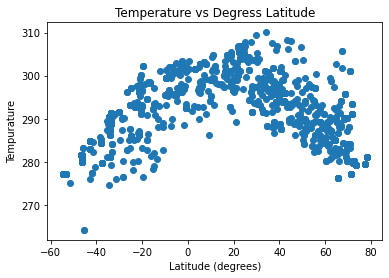

In [81]:
# Scatter plot - tempurature vs latitude


plt.scatter(latitude, tempurature, marker = "o")
plt.title("Temperature vs Degress Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Tempurature")
plt.show()
                               

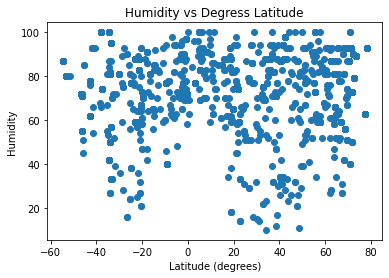

In [83]:
# Scatter plot - humidity vs latitude

plt.scatter(latitude, humidity, marker = "o")
plt.title("Humidity vs Degress Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity")
plt.show()
                               

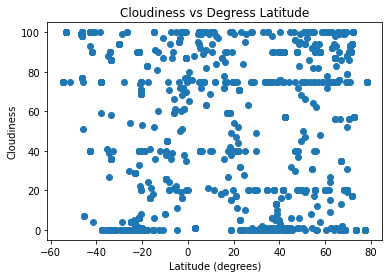

In [84]:
# Scatter plot - cloudiness vs latitude


plt.scatter(latitude, cloudiness, marker = "o")
plt.title("Cloudiness vs Degress Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness")
plt.show()
                               

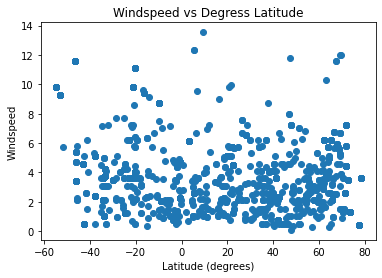

In [85]:
# Scatter plot - windspeed vs latitude


plt.scatter(latitude, windspeed, marker = "o")
plt.title("Windspeed vs Degress Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Windspeed")
plt.show()
                               

In [53]:
# Create Northern adn Southern hemisphere datasets and define regression and plot func

## WORK ON CREATING A STANDARD FUNCTION TO AUTOMATE ALL OF THE REGRESSION AND POSSIBLY PLOTTING

north_df = clean_df[clean_df["Latitude"] > 0]
south_df = clean_df[clean_df["Latitude"] < 0]

x_values = []
y_values = []

# def regression (x_values, y_values):
#    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)


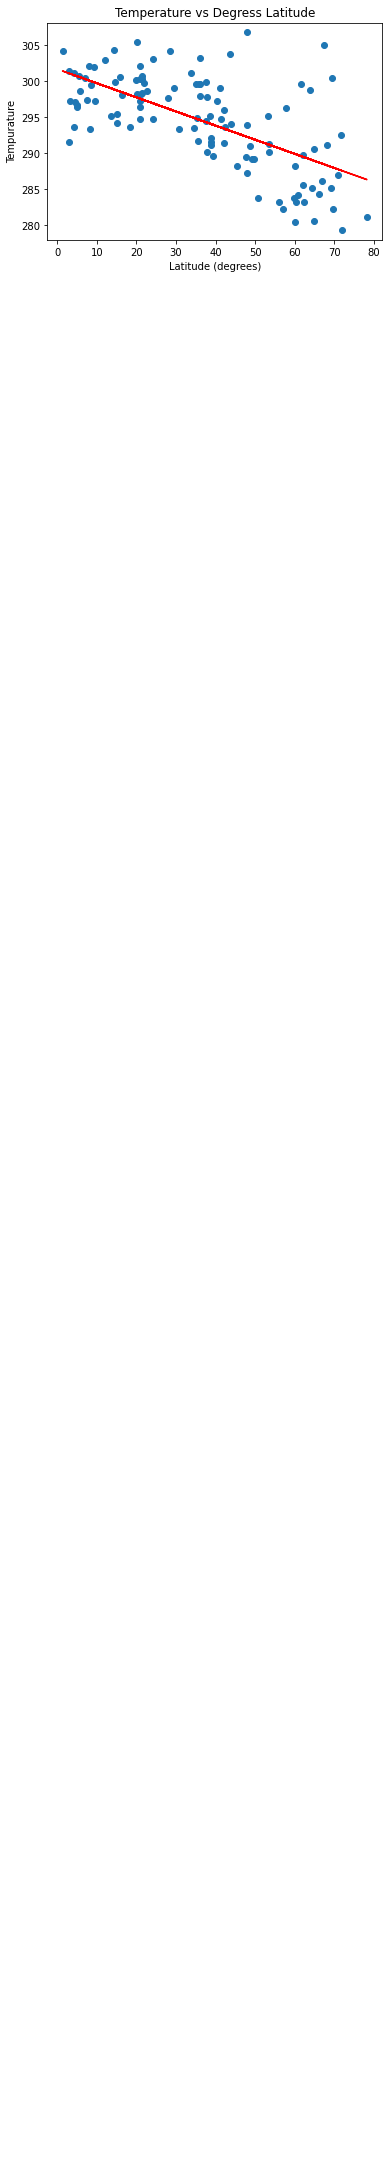

-0.6369113558328423


In [86]:
# Nothern Hemisphere:  Tempurature vs. Latitude
x_values = north_df["Latitude"]
y_values = north_df["Tempurature"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("Temperature vs Degress Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Tempurature")
plt.show()
print(rvalue)


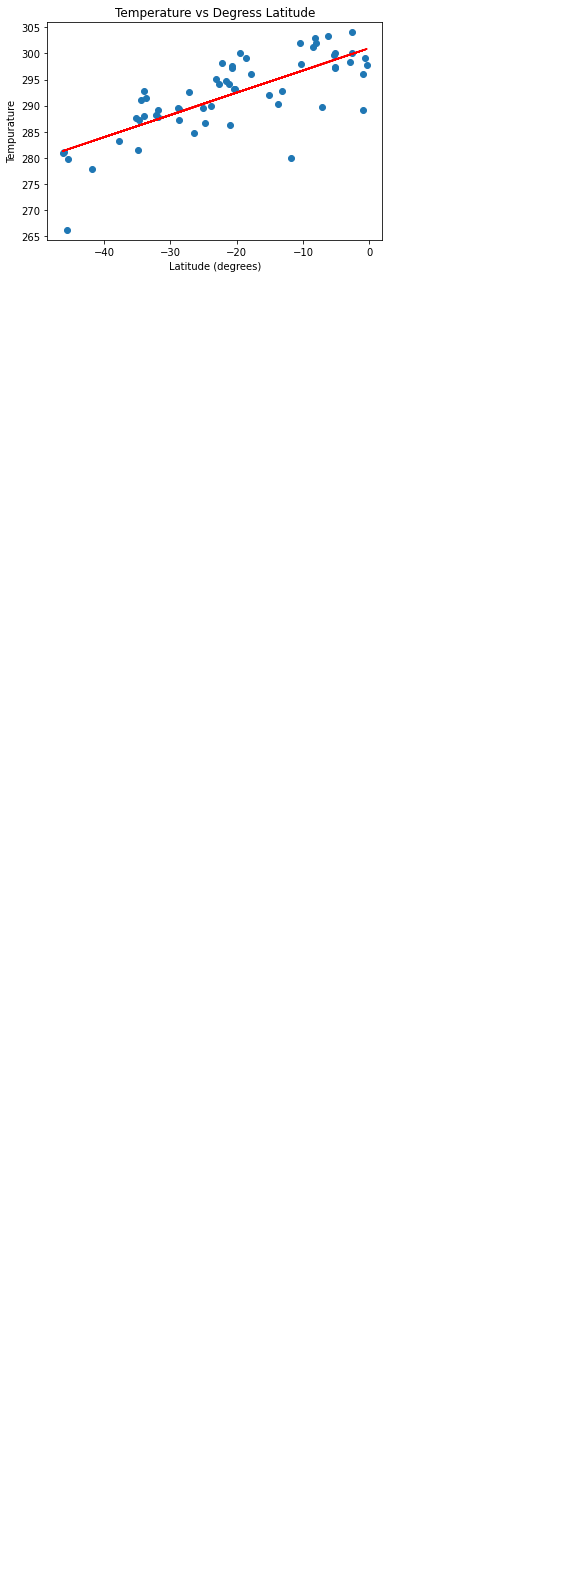

0.7554010765761242


In [87]:
# Southern Hemisphere:  Tempurature vs. Latitude
x_values = south_df["Latitude"]
y_values = south_df["Tempurature"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("Temperature vs Degress Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Tempurature")
plt.show()
print(rvalue)

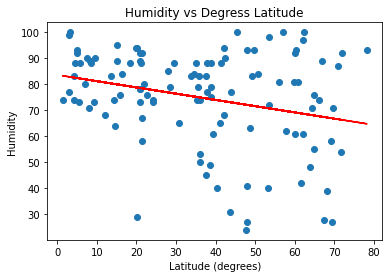

-0.2730630438711797


In [88]:
# Nothern Hemisphere:   Humidity vs. latitude
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("Humidity vs Degress Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity")
plt.show()
print(rvalue)

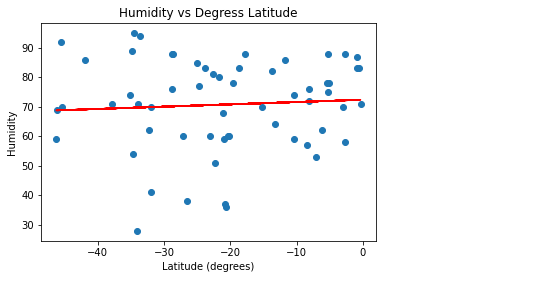

0.06620276089496303


In [89]:
# Southern Hemisphere:  Humidity vs. latitude
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("Humidity vs Degress Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity")
plt.show()
print(rvalue)

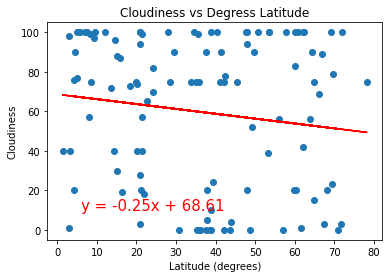

-0.13739010286874295


In [90]:
# Nothern Hemisphere: Cloudiness vs. Latitude
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("Cloudiness vs Degress Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness")
plt.show()
print(rvalue)

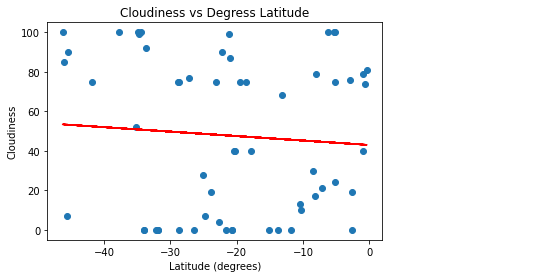

-0.07627247287106337


In [91]:
# Southern Hemisphere: Cloudiness vs. Latitude
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("Cloudiness vs Degress Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness")
plt.show()
print(rvalue)

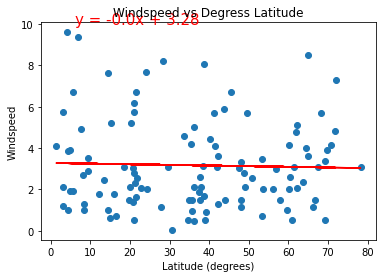

-0.030371212695724438


In [92]:
# Nothern Hemisphere:  Wind Speed vs. latitude
x_values = north_df["Latitude"]
y_values = north_df["Windspeed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("Windspeed vs Degress Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Windspeed")
plt.show()
print(rvalue)

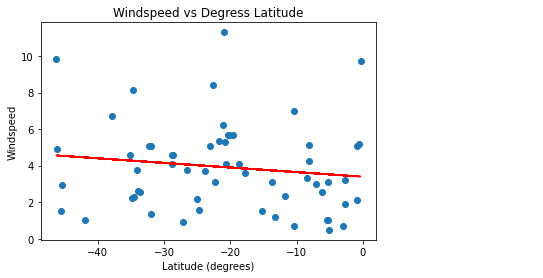

-0.1385238233069806


In [93]:
# Southern Hemisphere:  Wind Speed vs. latitude
x_values = south_df["Latitude"]
y_values = south_df["Windspeed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.scatter(x_values, y_values)
plt.title("Windspeed vs Degress Latitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Windspeed")
plt.show()
print(rvalue)